In [5]:
import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import glob
import sys
import re

## sensitivity up to the first FP table + bar chart 

In [55]:
# Initialize the dictionary to store the data
results_dict = {}
validity_dict = {}

# Open the file in read mode
with open('test_results_SUTTFFP.txt', 'r') as file:
    # Read lines in chunks of three
    while True:
        # Read the next three lines
        line1 = file.readline().strip()
        line2 = file.readline().strip()
        line3 = file.readline().strip()
        
        # Break the loop if EOF is reached
        if not line3:
            break
        
        # Extract key components from the first line
        # Format: Processing val_search/MI/MI_-6.0_-1.5_config_results
        #print(parts)
        parts = line1.split('/')
        key = parts[1].split('-')[0][:-1]  # Extract 'MI'
        if key =="aa_3Dn": key = "3Dn_aa"
        if key =="dihedral_3Di": key = "3Di_dihedral"
        if key =="dihedral_3Dn": key = "3Dn_dihedral"
        if key =="graph_clusters": key = "3Dn"
        if key in ["jaccard_vqvae","MI"]: continue

        # Extract the values from the third line
        values = tuple(map(float, line3.split()))
        
        # Add to the dictionary
        results_dict[key] = values
        
        # Check if the second line contains "93" and add to the validity dictionary
        is_valid = '1441.00' in line2
        validity_dict[key] = is_valid

# Print the resulting dictionary
#print(results_dict)
#print(validity_dict)
for i,val in results_dict.items():
    print(i)
    print(val)

famd = {}
for i,val in results_dict.items():
    famd[i]=val[0]
sfd = {}
for i,val in results_dict.items():
    sfd[i]=val[1]
fd = {}
for i,val in results_dict.items():
    fd[i]=val[2]

3Di
(0.829863, 0.431486, 0.108477)
aa
(0.635651, 0.176235, 0.00582649)
BV
(0.885819, 0.503001, 0.120866)
3Di_3Dn
(0.874031, 0.49539, 0.150602)
3Di_3Dn_aa
(0.885081, 0.517545, 0.151769)
3Di_3Dn_dihedral
(0.872558, 0.512328, 0.150073)
3Di_aa
(0.864143, 0.490987, 0.132925)
3Dn_aa
(0.836165, 0.400223, 0.0691339)
3Di_dihedral
(0.839227, 0.449878, 0.115248)
3Dn_dihedral
(0.849965, 0.45329, 0.102799)
dihedral
(0.750743, 0.316444, 0.034937)
3Dn
(0.814151, 0.392855, 0.0852466)


In [37]:
sfd

{'3Di': 0.431486,
 'aa': 0.176235,
 'BV': 0.503001,
 '3Di_3Dn': 0.49539,
 '3Di_3Dn_aa': 0.517545,
 '3Di_3Dn_dihedral': 0.512328,
 '3Di_aa': 0.490987,
 '3Dn_aa': 0.400223,
 '3Di_dihedral': 0.449878,
 '3Dn_dihedral': 0.45329,
 'dihedral': 0.316444,
 '3Dn': 0.392855}

In [53]:
def plot_stacked(sfd, level):
    # Filtered categories with non-zero additional heights
    filtered_categories = ["3Di", "3Dn", "3Di_3Dn"]
    base_heights_aa = []
    base_heights_dihedral = []
    additional_heights_aa = []
    additional_heights_dihedral = []

    for key in filtered_categories:
        add_height_aa = (sfd.get(key + "_aa", 0) - sfd[key]) if key + "_aa" in sfd else 0
        add_height_dihedral = (sfd.get(key + "_dihedral", 0) - sfd.get(key, 0)) if key + "_dihedral" in sfd else 0
        base_heights_aa.append(sfd[key])
        base_heights_dihedral.append(sfd[key])
        additional_heights_aa.append(add_height_aa)
        additional_heights_dihedral.append(add_height_dihedral)

    # Add standalone bars for 'aa', 'dihedral', and 'BV'
    filtered_categories = ['aa', 'dihedral'] + filtered_categories + ['BV']
    base_heights = [sfd['aa'], sfd['dihedral']] + base_heights_aa + [sfd['BV']]
    additional_heights = [0, 0] + additional_heights_aa + [0]  # No additional height for standalone bars

    # Bar width and x-coordinates for filtered categories
    bar_width = 0.35
    gap = 0.05  # Gap between bars
    x = np.arange(len(filtered_categories))

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot standalone 'aa' and 'dihedral' bars with a smaller gap between them
    plt.bar(x[:2], base_heights[:2], width=bar_width, color=[label_to_color[key] for key in filtered_categories[:2]])
    plt.bar(x[:2], additional_heights[:2], bottom=base_heights[:2], width=bar_width, color=label_to_color['aa'], label='+ AA')

    # Plot "aa" and "dihedral" as interwoven pairs for the main categories
    plt.bar(x[2:-1] - bar_width/2 - gap/2, base_heights_aa, width=bar_width, color=[label_to_color[key] for key in filtered_categories[2:-1]])
    plt.bar(x[2:-1] - bar_width/2 - gap/2, additional_heights_aa, bottom=base_heights_aa, width=bar_width, color=label_to_color['aa'])

    plt.bar(x[2:-1] + bar_width/2 + gap/2, base_heights_dihedral, width=bar_width, color=[label_to_color[key] for key in filtered_categories[2:-1]])
    plt.bar(x[2:-1] + bar_width/2 + gap/2, additional_heights_dihedral, bottom=base_heights_dihedral, width=bar_width, color=label_to_color['dihedral'], label='+ dihedral')

    # Plot standalone 'BV' bar
    plt.bar(x[-1], base_heights[-1], width=bar_width, color=label_to_color['BV'])

    # Labeling
    plt.xticks(x, filtered_categories)
    plt.xlabel('Alphabet')
    plt.ylabel(f'Senstivity up to the first FP, {level}')
    plt.title(f'Impact of combining AA and dihedral alphabets on {level} results')
    plt.legend()
    plt.show()


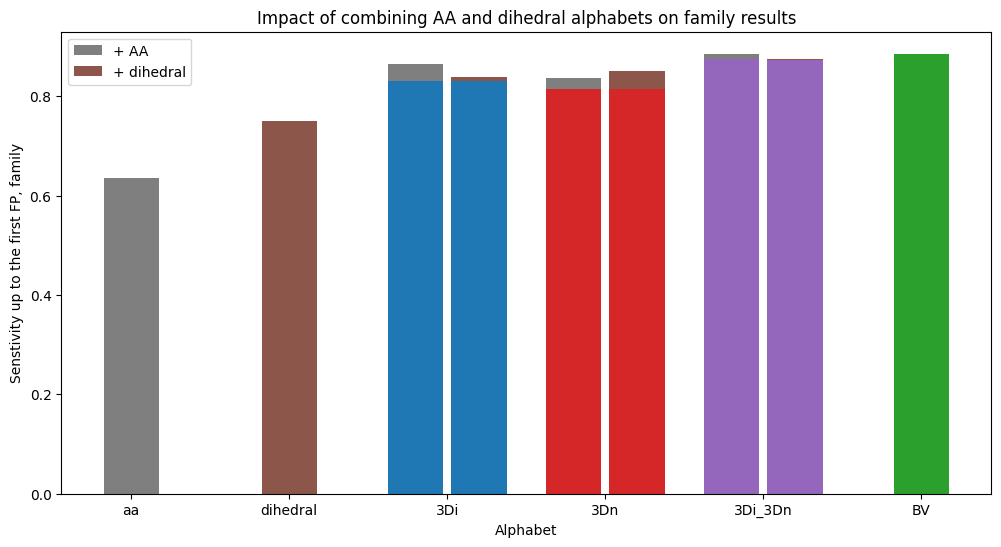

In [56]:
plot_stacked(famd, "family")

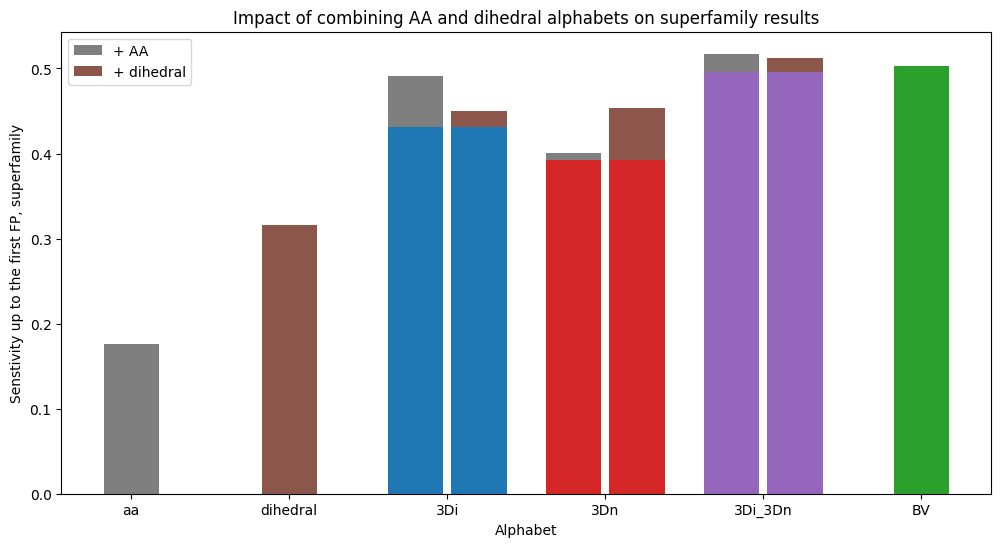

In [54]:
plot_stacked(sfd, "superfamily")

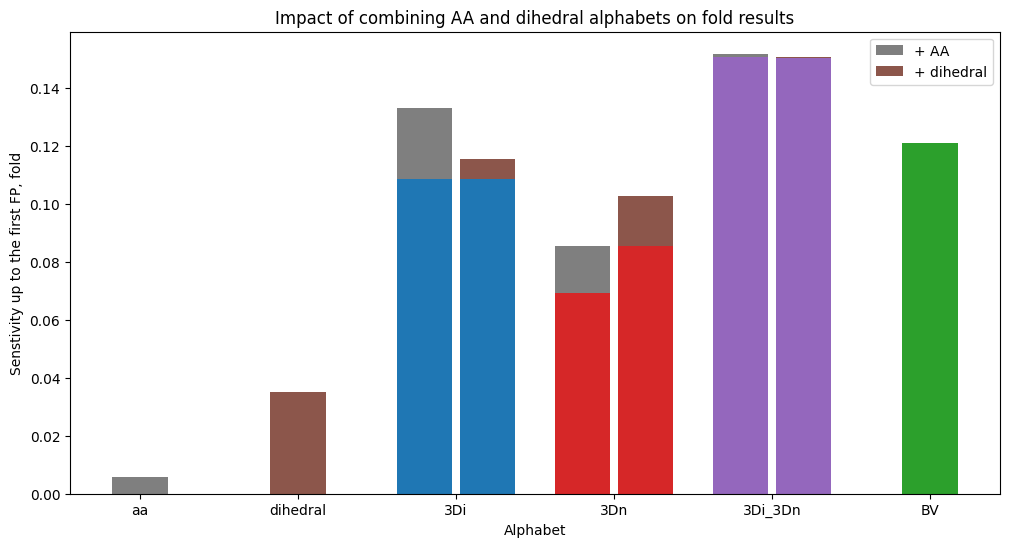

In [57]:
plot_stacked(fd, "fold")

## CDF and associated plots

In [2]:
def load_csv_to_list(file_path):
    with open(file_path, mode='r', newline='') as csvfile:
        return [item for row in csv.reader(csvfile) for item in row]

In [3]:
data_path = "/cluster/tufts/pettilab/shared/structure_comparison_data"
path_to_results = "test_search"
test_query_list = load_csv_to_list(f"{data_path}/protein_data/test_queries.csv")
test_query_list.remove('d1o7d.2') #not included

In [4]:
rocx_files = glob.glob(f'{path_to_results}/*.rocx')
rocx_files += glob.glob(f'{path_to_results}_combos/*.rocx')
rocx_files.remove("test_search/jaccard_vqvae_-12.0_-0.5_config_results.rocx")
rocx_files.remove("test_search/MI_-6.0_-2.0_config_results.rocx")

In [14]:
label_to_color = {
    'BV': sns.color_palette()[2],  # BV is green
    'dihedral': sns.color_palette()[5],  # dihedral is brown
    'aa': sns.color_palette()[7],
    '3Di': sns.color_palette()[0],  # 3Di is red
    '3Dn': sns.color_palette()[3],  # 3Dn is blue
    '3Di_3Dn':sns.color_palette()[4],  # 3Di_3Dn is purple
    '3Di_3Dn_aa': sns.color_palette()[4],  # 3Di_3Dn_aa is a darker shade of red
    '3Di_aa': sns.color_palette()[0],  # 3Di_aa is a darker shade of red
    'aa_3Dn': sns.color_palette()[3],  # aa_3Dn is a darker shade of blue
}

In [9]:
sfd ={}
# Loop through each .rocx file and plot its ECDF
for file in rocx_files:
    # Load the file into a DataFrame
    df = pd.read_csv(file, delimiter='\t')
    
    # Filter the DataFrame based on test_query_list
    df_filtered = df[df['NAME'].isin(test_query_list)].sort_values(by='NAME')
    
    # Extract the label from the file name (you can customize how the label is generated)
    label = file.split('/')[-1].split('-')[0][:-1]  # Get the file name from the full path
    if label == 'graph_clusters': label = "3Dn"
    # Plot the ECDF for this file
    sfd[label]=list(df_filtered["SFAM"])


Text(0, 0.5, '3Di_3Dn')

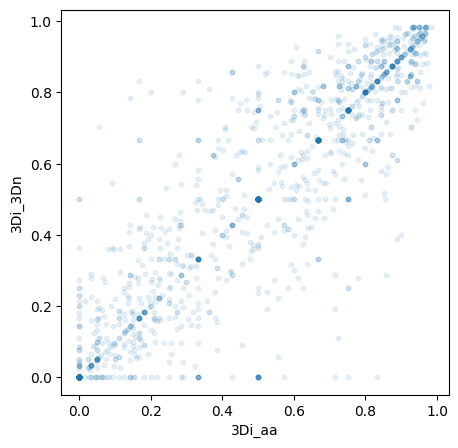

In [10]:
plt.figure(figsize = (5,5))
plt.scatter(sfd["3Di_aa"],sfd["3Di_3Dn"],alpha = .1, s =10)
plt.xlabel("3Di_aa")
plt.ylabel("3Di_3Dn")

(array([276., 110.,  96.,  75.,  67., 170., 119., 152., 231., 145.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

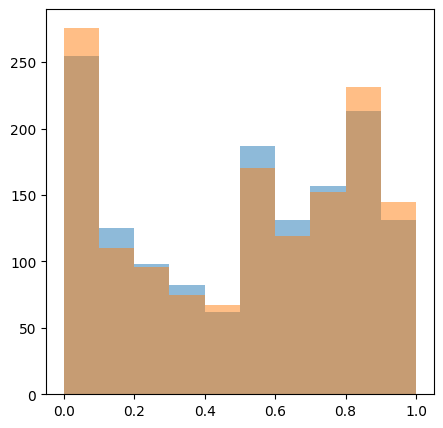

In [11]:
plt.figure(figsize = (5,5))

bins=np.arange(0,1.1,.1)
plt.hist(sfd["3Di_aa"],alpha = .5, bins = bins)
plt.hist(sfd["3Di_3Dn"],alpha = .5, bins = bins)
 # combo has more good and more bad results as compared to 3Di-aa

(array([213., 140.,  95.,  91.,  67., 193., 134., 167., 208., 133.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

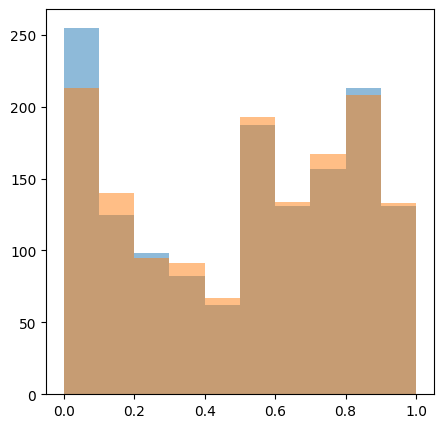

In [12]:
plt.figure(figsize = (5,5))

bins=np.arange(0,1.1,.1)
plt.hist(sfd["3Di_aa"],alpha = .5, bins = bins)
plt.hist(sfd["BV"],alpha = .5, bins = bins)
# BV has fewer really bad examples

Text(0.5, 1.0, 'Sensitivity up to the first FP by superfamily')

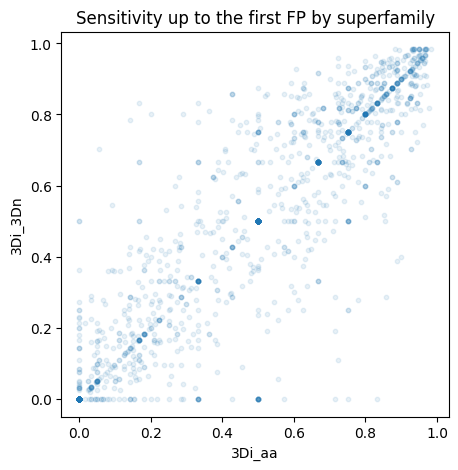

In [19]:
plt.figure(figsize = (5,5))
plt.scatter(sfd["3Di_aa"],sfd["3Di_3Dn"],alpha = .1, s =10)
plt.xlabel("3Di_aa")
plt.ylabel("3Di_3Dn")
plt.title("Sensitivity up to the first FP by superfamily")

Text(0.5, 1.0, 'Sensitivity up to the first FP by superfamily')

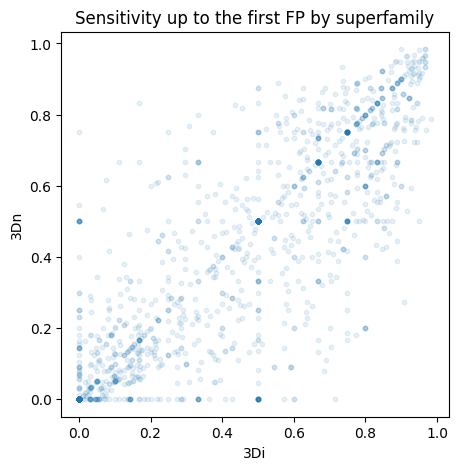

In [20]:
plt.figure(figsize = (5,5))
plt.scatter(sfd["3Di"],sfd["3Dn"],alpha = .1, s = 10)
plt.xlabel("3Di")
plt.ylabel("3Dn")
plt.title("Sensitivity up to the first FP by superfamily")

Text(0.5, 1.0, 'Sensitivity up to the first FP by superfamily')

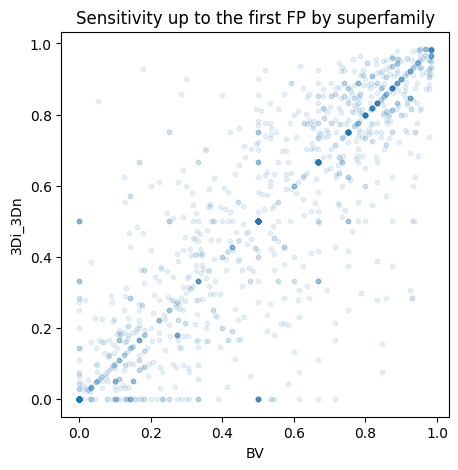

In [21]:
plt.figure(figsize = (5,5))
plt.scatter(sfd["BV"],sfd["3Di_3Dn"],alpha = .1, s = 10)
plt.xlabel("BV")
plt.ylabel("3Di_3Dn")
plt.title("Sensitivity up to the first FP by superfamily")

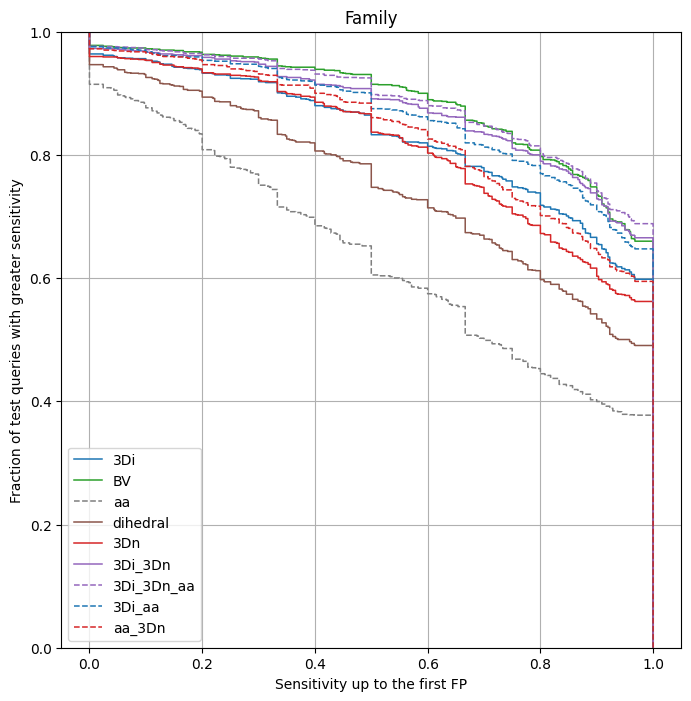

In [15]:
# Loop through each .rocx file and plot its ECDF
plt.figure(figsize=(8, 8))
for file in rocx_files:
    # Load the file into a DataFrame
    df = pd.read_csv(file, delimiter='\t')
    
    # Filter the DataFrame based on test_query_list
    df_filtered = df[df['NAME'].isin(test_query_list)]
    
    # Extract the label from the file name (you can customize how the label is generated)
    label = file.split('/')[-1].split('-')[0][:-1]  # Get the file name from the full path
    if label == 'graph_clusters': label = "3Dn"
    # Plot the ECDF for this file
    if "aa" in label: linestyle='--'
    else: linestyle='-'
    sns.ecdfplot(data=df_filtered, x='FAM', complementary=True, label=label, linewidth = 1.1, linestyle=linestyle, color = label_to_color.get(label, 'black'))

# Customize the plot
plt.xlabel('Sensitivity up to the first FP')
plt.ylabel('Fraction of test queries with greater sensitivity')
plt.title('Family')
plt.legend()  # Display the legend
plt.grid()

# Show the plot
plt.show()

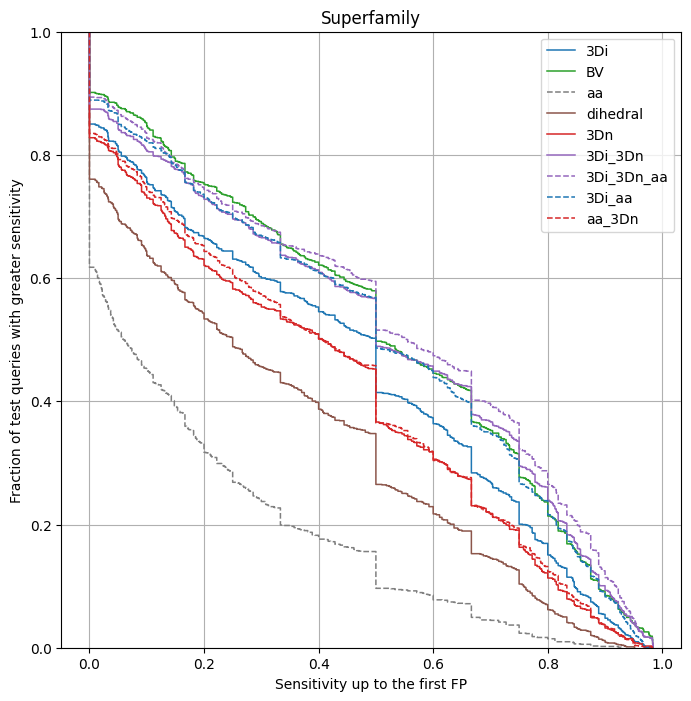

In [16]:
# Loop through each .rocx file and plot its ECDF
plt.figure(figsize=(8, 8))
for file in rocx_files:
    # Load the file into a DataFrame
    df = pd.read_csv(file, delimiter='\t')
    
    # Filter the DataFrame based on test_query_list
    df_filtered = df[df['NAME'].isin(test_query_list)]
    
    # Extract the label from the file name (you can customize how the label is generated)
    label = file.split('/')[-1].split('-')[0][:-1]  # Get the file name from the full path
    if label == 'graph_clusters': label = "3Dn"
    # Plot the ECDF for this file
    if "aa" in label: linestyle='--'
    else: linestyle='-'
    sns.ecdfplot(data=df_filtered, x='SFAM', complementary=True, label=label, linewidth = 1.1, linestyle=linestyle, color = label_to_color.get(label, 'black'))

# Customize the plot
plt.xlabel('Sensitivity up to the first FP')
plt.ylabel('Fraction of test queries with greater sensitivity')
plt.title('Superfamily')
plt.legend()  # Display the legend
plt.grid()

# Show the plot
plt.show()

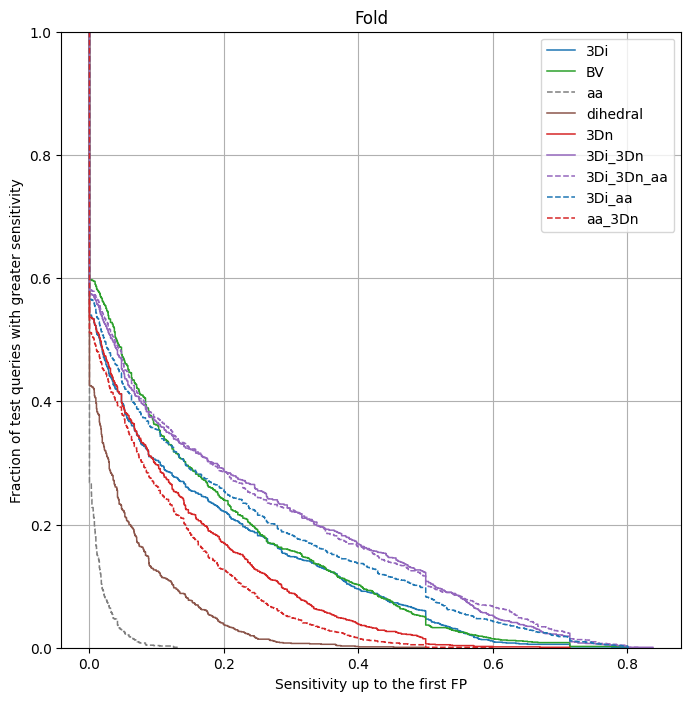

In [17]:
# Loop through each .rocx file and plot its ECDF
plt.figure(figsize=(8, 8))
for file in rocx_files:
    # Load the file into a DataFrame
    df = pd.read_csv(file, delimiter='\t')
    
    # Filter the DataFrame based on test_query_list
    df_filtered = df[df['NAME'].isin(test_query_list)]
    
    # Extract the label from the file name (you can customize how the label is generated)
    label = file.split('/')[-1].split('-')[0][:-1]  # Get the file name from the full path
    if label == 'graph_clusters': label = "3Dn"
    # Plot the ECDF for this file
    if "aa" in label: linestyle='--'
    else: linestyle='-'
    sns.ecdfplot(data=df_filtered, x='FOLD', complementary=True, label=label, linewidth = 1.1, linestyle=linestyle, color = label_to_color.get(label, 'black'))

# Customize the plot
plt.xlabel('Sensitivity up to the first FP')
plt.ylabel('Fraction of test queries with greater sensitivity')
plt.title('Fold')
plt.legend()  # Display the legend
plt.grid()

# Show the plot
plt.show()

## Precision-recall

In [8]:
# Compute info for each query + counts from lookup file
id2fam = {}
id2sfam = {}
id2fold = {}
famCnt = {}
sfamCnt = {}
foldCnt = {}

with open("scop_lookup.fix.tsv", 'r') as f1:
    for line in f1:
        parts = line.strip().split()
        if len(parts) < 2:
            continue
        id_ = parts[0]
        fam = parts[1]

        id2fam[id_] = fam
        famCnt[fam] = famCnt.get(fam, 0) + 1

        # Process sfam and fold by removing trailing numbers after a dot
        sfam = re.sub(r'\.\d+$', '', fam)
        id2sfam[id_] = sfam
        sfamCnt[sfam] = sfamCnt.get(sfam, 0) + 1

        fold = re.sub(r'\.\d+$', '', sfam)
        id2fold[id_] = fold
        foldCnt[fold] = foldCnt.get(fold, 0) + 1

In [9]:
all_comps_files = glob.glob(f'{path_to_results}/*all_comps')
all_comps_files += glob.glob(f'{path_to_results}_combos/*all_comps')
all_comps_files.remove("test_search/jaccard_vqvae_-12.0_-0.5_config_results_all_comps")
all_comps_files.remove("test_search/MI_-6.0_-2.0_config_results_all_comps")

In [10]:
for file in all_comps_files:
    print(file)   
    label = file.split('/')[-1].split('-')[0][:-1]  # Get the file name from the full path
    if label == 'graph_clusters': label = "3Dn"
    print(label)

test_search/3Di_-10.0_-1.0_config_results_all_comps
3Di
test_search/BV_-8.0_-1.0_config_results_all_comps
BV
test_search/aa_-6.0_-0.5_config_results_all_comps
aa
test_search/dihedral_-6.0_-0.5_config_results_all_comps
dihedral
test_search/graph_clusters_-10.0_-0.5_config_results_all_comps
3Dn
test_search_combos/3Di_3Dn_-10.0_-0.5_0.6_config_results_all_comps
3Di_3Dn
test_search_combos/3Di_3Dn_aa_-2.0_-0.5_0.4_0.2_0.4_config_results_all_comps
3Di_3Dn_aa
test_search_combos/3Di_aa_-10.0_-1.0_2.1_config_results_all_comps
3Di_aa
test_search_combos/aa_3Dn_-6.0_-0.5_0.6_config_results_all_comps
aa_3Dn


In [16]:
thresholds = np.arange(10, 100 ,3)

In [17]:
%%time
recall_by_method = {}
precision_by_method = {}
for all_comp_file_path in all_comps_files:
    prev_id1 = -1

    TP_LDDTS_FAM = {}
    TP_LDDTS_SFAM = {}
    TP_LDDTS_FOLD = {}
    FP_LDDTS = {}

    with open(all_comp_file_path, 'r') as f2:
        label = all_comp_file_path.split('/')[-1].split('-')[0][:-1]  # Get the file name from the full path
        if label == 'graph_clusters': label = "3Dn"
        print(label)
        for nr, line in enumerate(f2, 1):
            parts = line.strip().split()
            if len(parts) != 5: continue

            id1, id2, lddt = parts[0], parts[1], float(parts[2])
            if id1!= prev_id1:
                TP_LDDTS_FAM[id1] = []
                TP_LDDTS_SFAM[id1] = []
                TP_LDDTS_FOLD[id1] = []
                FP_LDDTS[id1] =[]
                prev_id1 = id1

            if id2fam[id1]==id2fam[id2]:
                TP_LDDTS_FAM[id1].append(lddt)
            if id2sfam[id1]==id2sfam[id2]:
                TP_LDDTS_SFAM[id1].append(lddt)
            if id2fold[id1]==id2fold[id2]:
                TP_LDDTS_FOLD[id1].append(lddt)
            if id2fold[id1]!=id2fold[id2] and lddt>0.1:
                FP_LDDTS[id1].append(lddt)

    nq = len(FP_LDDTS.keys())
    precision_fam_list = []
    recall_fam_list = []
    precision_sfam_list = []
    recall_sfam_list = []
    precision_fold_list = []
    recall_fold_list = []
    for thresh in thresholds:
        #print(thresh)
        precision_fam = 0
        recall_fam = 0
        precision_sfam = 0
        recall_sfam = 0
        precision_fold = 0
        recall_fold = 0
        for query in FP_LDDTS.keys():
            tp_fam = sum(TP_LDDTS_FAM[query]>thresh)
            tp_sfam = sum(TP_LDDTS_SFAM[query]>thresh)
            tp_fold = sum(TP_LDDTS_FOLD[query]>thresh)
            fp =  sum(FP_LDDTS[query]>thresh)
            #print(tp_sfam/sfamCnt[id2sfam[query]],tp_fam/(tp_fam+fp))
            recall_fam+= tp_fam/famCnt[id2fam[query]]
            precision_fam += 1 if np.isnan(tp_fam/(tp_fam+fp)) else tp_fam/(tp_fam+fp) 
            recall_sfam+= tp_sfam/sfamCnt[id2sfam[query]]
            precision_sfam += 1 if np.isnan(tp_sfam/(tp_sfam+fp)) else tp_sfam/(tp_sfam+fp) 
            recall_fold+= tp_fold/foldCnt[id2fold[query]]
            precision_fold += 1 if np.isnan(tp_fold/(tp_fold+fp)) else tp_fold/(tp_fold+fp) 
        precision_fam_list.append(precision_fam/nq)
        recall_fam_list.append(recall_fam/nq)
        precision_sfam_list.append(precision_sfam/nq)
        recall_sfam_list.append(recall_sfam/nq)
        precision_fold_list.append(precision_fold/nq)
        recall_fold_list.append(recall_fold/nq)
        #print(precision_sfam_list[-1], recall_sfam_list[-1])
    recall_by_method[label]= (recall_fam_list,recall_sfam_list,recall_fold_list)
    precision_by_method[label]= (precision_fam_list,precision_sfam_list,precision_fold_list)


3Di


<timed exec>:58: RuntimeWarning: invalid value encountered in scalar divide
<timed exec>:60: RuntimeWarning: invalid value encountered in scalar divide
<timed exec>:62: RuntimeWarning: invalid value encountered in scalar divide


BV
aa
dihedral
3Dn
3Di_3Dn
3Di_3Dn_aa
3Di_aa
aa_3Dn
CPU times: user 6min 30s, sys: 5.38 s, total: 6min 36s
Wall time: 6min 35s


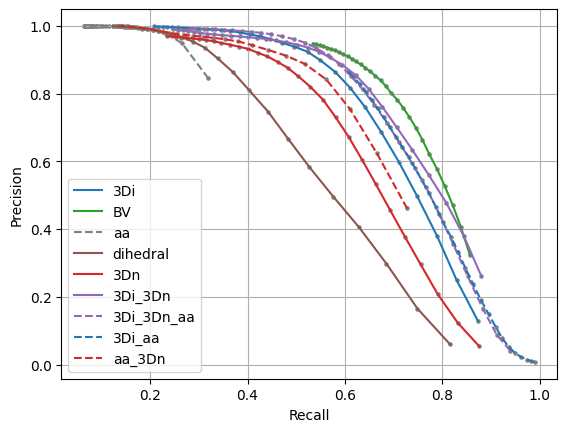

In [18]:
for label in recall_by_method.keys():
    if "aa" in label: linestyle='--'
    else: linestyle='-'
    plt.scatter(recall_by_method[label][1], precision_by_method[label][1], s =5, color = "Grey")
                #, c = thresholds, cmap ="Greys", s =5)
    plt.plot(recall_by_method[label][1], precision_by_method[label][1], label = label, linestyle = linestyle, color = label_to_color[label])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

In [19]:
thresholds

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58,
       61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97])

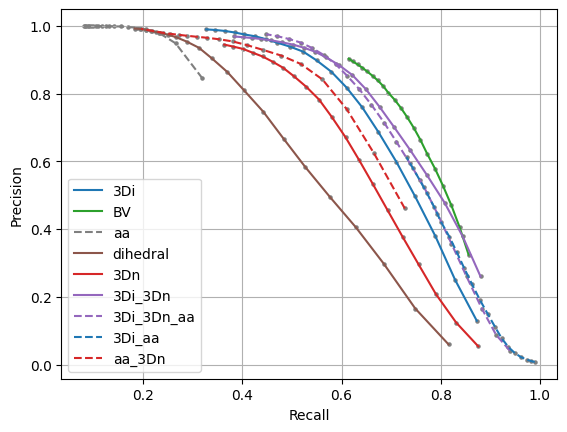

In [15]:
for label in recall_by_method.keys():
    if "aa" in label: linestyle='--'
    else: linestyle='-'
    plt.scatter(recall_by_method[label][1], precision_by_method[label][1], s =5, color = "Grey")
                #, c = thresholds, cmap ="Greys", s =5)
    plt.plot(recall_by_method[label][1], precision_by_method[label][1], label = label, linestyle = linestyle, color = label_to_color[label])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

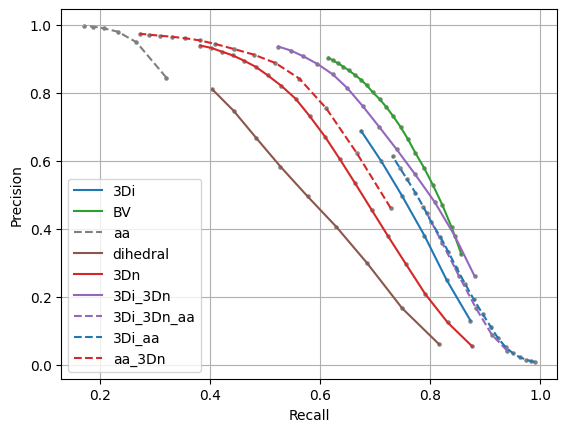

In [23]:
for label in recall_by_method.keys():
    if "aa" in label: linestyle='--'
    else: linestyle='-'
    plt.scatter(recall_by_method[label][1], precision_by_method[label][1], s =5, color = "Grey")
                #, c = thresholds, cmap ="Greys", s =5)
    plt.plot(recall_by_method[label][1], precision_by_method[label][1], label = label, linestyle = linestyle, color = label_to_color[label])

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()